<a href="https://colab.research.google.com/github/Hertie-School-Machine-Learning-F2022/git-github-assignment-and-fundamentals-nikpaw/blob/main/problem_set_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Set 2

In this problem set you will apply different preprocessing steps, and observe how data and results change depending on the chosen process.

The problem set is due on: 21.10.2022

Student name: Niklas Pawelzik

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

First load the 'auto-mpg.csv' dataset available to you on the GitHub repo

In [ ]:
# Upload the file into the notebook and set it as a dataframe
from google.colab import files
uploaded = files.upload()


Saving auto-mpg.csv to auto-mpg.csv


In [ ]:
# Inspect the first five samples
import io
car_data = pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))

car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**Question 1**: What is the car name of sample index 3?

(Hint: Remember that Python index begins at 0)

**Answer**: 
*The car name of sample index 3 is 'amc rebel sst'.*

In [ ]:
print(car_data[3:4])

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
3  16.0          8         304.0        150    3433          12.0          70   

   origin       car name  
3       1  amc rebel sst  


In [ ]:
# Observe the data types of each variable
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


Question 2: What are the variables that are saved as categorical in the data frame?

**Answer**: 
*None of the variables are saved as categorical in the pandas data frame. The variables "car name" and "horsepower" are saved as objects, which is the python version of categorical variables. Conceptionally speaking, they are categorical variables, even though technically they are not saved as "categorical".*

In [ ]:
# Set as mpg, displacement and weight as X

X =  car_data[['mpg', 'displacement', 'weight']]

# Set acceleration as the target 

y = car_data['acceleration']

X

,mpg,displacement,weight
0,18.0,307.0,3504
1,15.0,350.0,3693
2,18.0,318.0,3436
3,16.0,304.0,3433
4,17.0,302.0,3449
...,...,...,...
393,27.0,140.0,2790
394,44.0,97.0,2130
395,32.0,135.0,2295
396,28.0,120.0,2625


[[0.2393617  0.61757106 0.5361497 ]
 [0.15957447 0.72868217 0.58973632]
 [0.2393617  0.64599483 0.51686986]
 ...
 [0.61170213 0.17312661 0.19336547]
 [0.50531915 0.13436693 0.2869294 ]
 [0.58510638 0.13178295 0.31386447]]


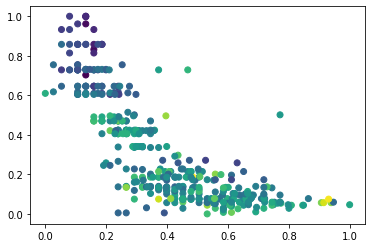

In [ ]:
# Import the preprocesser MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

# Set MinMaxScaler as the scaler and transform X

X_transformed = MinMaxScaler().fit_transform(X)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y);

# Inspect the array of the transformed values. 
print(X_transformed)

Question 3: What are the values of the first sample of X (d.p. 2)

(Hint: The first sample of X is the first row or the first value of each column)


**Answer**: 
*The values of the first sample of X are [0.2393617,  0.61757106, 0.5361497].*

[[-0.7064387   1.0906037   0.63086987]
 [-1.09075062  1.5035143   0.85433297]
 [-0.7064387   1.19623199  0.55047045]
 ...
 [ 1.08701694 -0.56103873 -0.79858454]
 [ 0.57460104 -0.70507731 -0.40841088]
 [ 0.95891297 -0.71467988 -0.29608816]]


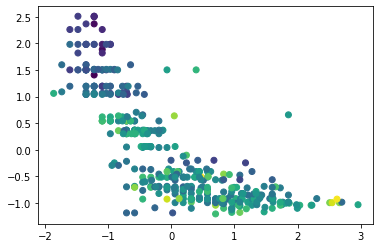

In [ ]:
# Import the preprocesser StandardScaler
from sklearn.preprocessing import StandardScaler

# Use StandardScaler to transform X
X_transformed_2 = StandardScaler().fit_transform(X)
plt.scatter(X_transformed_2[:, 0], X_transformed_2[:, 1], c=y);

# Inspect the array of the transformed values. 
print(X_transformed_2)

Question 4: What are the values of the first sample of X? (d.p. 2)

(Hint: The first sample of X is the first row or the first value of each column)


**Answer**: 
*The values of the first sample of X are [-0.7064387,   1.0906037,   0.63086987].*

Quesiton 5: which of the following statements is true?

*   MinMax Scaler is based on the sample mean
*   StandardScaler can only be between 0 and 1
*   MinMaxScaler can only be between 0 and 1
*   Standard Scaler can only be used when sample values are between 0 and 1


**Answer**: 
*MinMaxScaler can only be between 0 and 1.*

In [ ]:
# Now set traing and testing sets with a test size of 0.20 and random state = 2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

X_test

,mpg,displacement,weight
94,13.0,440.0,4735
32,25.0,98.0,2046
279,29.5,98.0,2135
178,23.0,120.0,2957
354,34.5,100.0,2320
...,...,...,...
298,23.0,350.0,3900
222,17.0,260.0,4060
65,14.0,351.0,4129
261,18.1,258.0,3410


Question 6: How many samples are in X_test?


**Answer**: 
*X_test has 80 rows, thus the same number of samples are contained.*

In [ ]:
# Create two pipelines:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# (1) preprocessing using Quantile Transformer (set number of quantiles to = 4)
# and model using linear regression 

pipe_1 = Pipeline([
    ("scale", QuantileTransformer(n_quantiles = 4)),
    ("model", LinearRegression())
])


# (2) preprocessing using MinMaxScaler, and model using linear regression

pipe_2 = Pipeline([
    ("scale", MinMaxScaler()),
    ("model", LinearRegression())
])


# After setting the pipelines, fit and predict the Pipeline the uses Quantile Trans 
# only using X_train and y_train

pipe_1.fit(X_train, y_train)
pred_1 = pipe_1.predict(X_train)
print(pred_1)


# Calcuate the mean_sqaured_error, all parameters are set to default

from sklearn.metrics import mean_squared_error

pipe_1_mse = mean_squared_error(y_train, pred_1) 

pipe_1_mse

[17.26323848 16.69063581 13.33628208 16.43704509 15.29492389 17.30146774
 17.05664383 16.35558841 13.98914937 14.18169172 16.16946897 13.81361569
 16.84565951 16.07332909 15.38871797 17.39116161 12.18219723  9.76308978
 17.6910719  17.51861823 16.15473795 16.34051598 16.71013632 14.80263847
 19.45913446 17.69752083 13.97257826 16.57831287 16.50203264 14.176569
 15.49265362 17.41357996 16.85098456 14.15602541 16.75087375 15.37050968
 13.33444769 15.92048231 15.8757757  12.14685043 14.81458353 14.67594946
 16.99868841 15.11243622 17.11739455 13.55582474 16.14442894 16.23753668
 16.85785035 17.3855502  16.90370438 13.97763896 15.1549396  16.7170634
 17.10217034 17.16200576 14.71007298 14.72079    17.22361904 12.82968316
 14.28086122 14.96193839 16.82877513 15.3463265  14.46832407 13.28349369
 15.13386674 13.32626339 15.00199546 16.85927107 14.44641179 13.88592075
 13.10549063 13.50237696 18.25469535 15.39443301 16.14874516 12.89613155
 13.44684719 13.20277971 17.65109222 16.69821075 13.41

5.15784189309905

Question 7: In pipeline 1 (Quantile Transfomer) what is the Mean Squared Error? 



**Answer**: 
*The MSE is 5,16 (5.15784189309905).*

In [ ]:
# Fit and predict the Pipleine of MinMaxScaler
# only using X_train and y_train
pipe_2.fit(X_train, y_train)
pred_2 = pipe_2.predict(X_train)
print(pred_2)


# Calcuate the mean_sqaured_error, all parameters are set to default

from sklearn.metrics import mean_squared_error

pipe_2_mse = mean_squared_error(y_train, pred_2) 

pipe_2_mse

[16.83381142 16.61650567 12.91248878 16.65705338 15.41675383 17.25876641
 16.86539999 16.79011028 13.73684478 14.13592602 16.694061   13.52345004
 16.67309606 16.28798609 15.62339722 16.90060305 10.7613804   7.47436971
 16.98966491 17.1193344  16.49462672 16.26755656 16.5666354  15.63178657
 18.20560807 16.89029846 14.25451094 16.41645866 16.58523407 14.00760054
 16.20476679 17.53115324 17.15852185 14.33305594 17.09312722 15.5875405
 14.01471464 16.34860456 16.42139523 10.80403953 15.8616157  14.87366015
 16.95259406 15.47090924 16.79702426 13.25639915 16.24182424 16.3746891
 16.73817636 17.28445587 16.87817965 14.16530081 15.9206996  17.06991568
 16.95093853 16.83737144 15.60076525 15.16528982 16.8682819  12.15354357
 14.08952462 15.62458057 17.02777492 15.88688116 14.9512081  13.95850923
 15.52550606 13.10948724 15.29508103 16.89183821 14.85964164 13.85698227
 12.32364108 12.94426975 17.78058762 16.04508009 16.47550436 12.0994249
 14.03668014 12.37116476 16.93388807 16.83409296 13.94

4.777282662204088

Question 8: In pipeline 2 (MinMaxSacler) what is Mean Squared Error? 


**Answer**: 
*The MSE is 4,78 (4.777282662204088).*

In [ ]:
# Based on that results, use the best model and now predict X_test

mm_results_test = pipe_2.fit(X_train, y_train).predict(X_test)

mm_results_test

# Calcuate the R2 metric, all parameters are set to default
from sklearn.metrics import r2_score
r2_score(y_test, mm_results_test)


0.27974679254989554

Question 9: What is the value of the R2 when predicting X_test? (d.p. 2)


**Answer**: 
*The R2 is 0,28 (0.27974679254989554).*

Question 10: How would you interpret the results of R2?


**Answer**: 
*The value indicates that the model is rather weak as it explains only 28% of the variation.*